# Goal

The goal of this script is to extract a row from the `StakeholderDino_FRs.csv` spreadsheet, which relates to the functional requirements discussed as part of a single unstructured interview, and to represent the contents of that row pictorially. The true goal of which, is to allow the interviewees to confirm whether we have truly captured their requirements in a less complicated manner than requiring them to wrap their heads around the master spreadsheet format.

As always, start by importing modules, including the previously unused/lesser known [DataMapPlot](https://datamapplot.readthedocs.io/en/latest/index.html), which will be crucial for building an interactive mindmap-style plot. [Random](https://docs.python.org/3/library/random.html) allows for the generation of _pseudo_-random numbers.

## Potential issue

The outputted html is being reported (by Teams, Safari and Outlook) as containing malware. This is despite the package being [actively maintained on Github](https://github.com/TutteInstitute/datamapplot) and promoted through [matplotlib's third party package listings](https://matplotlib.org/thirdpartypackages/). Although its not impossible that it contains malware, it is unlikely.

## Issue resolved

Bypassing the issue by instead setting up a repository in Github which uses Pages to host the plots.

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datamapplot
import seaborn as sns
from collections import Counter
import colorcet as cc
import os


To use DataMapPlot, a set of 2D coordinates (such as a 2D numpy array) and a list of labels, one for each coordinate pair is required. As we wish to make a map where the coordinates form a circle, we shall try to employ polar coordinates as part of a for loop. The number of positions that need generating relates to the number of top-level 'attributes' in the [master spreadsheet](https://livemanchesterac.sharepoint.com/:x:/r/sites/UOM-RIT-RLP/Shared%20Documents/New%20RLP/Open,%20Reproducible%20and%20Responsible%20Research/ORR12%20Digital%20Notebooks%20%26%20Sample%20Inventories/02%20Definition/Functional%20Requirements/Stakeholders_FRs_Bens.xlsm?d=w9d0e97af6a054764832f14b4d0730ed5&csf=1&web=1&e=N3aDly), as depicted in the innermost circle of [Miro](https://miro.com/app/board/uXjVLdds0oo=/?share_link_id=490665046930). Hence, the most sustainable way to produce the plot requires reading in data from the spreadsheet.

In [286]:
#import data
attrib_df = pd.read_csv('./data/AttributeDefinition.csv')
entries_df = pd.read_csv('./data/DefaultEntries.csv')
stakeholders_df = pd.read_csv('./data/StakeholderDiNo_FRs.csv',sep=';')
entries_df

,TL-01,G-01,U-01,U-02,U-03,CF-01,CF-02,CF-04,CF-05,CF-06,...,C-02,EF-01,EF-02,EF-03,EF-05,EF-06,IT-01,IT-02,IT-03,IT-04
0,Benchling Notebook,AGPL 3.0,No,Amharic,Online documentation,Annotation,All formats,Complete content in document format,Define own templates,Advanced/conditional search,...,ADA,Asset management,Create own plug-ins,Autoupload/folder watch,Calendar,Cross-project workflows,Command line input,No,Browser based,Cloud of own choice
1,Genemod,Apache 2.0,Unknown,Bengali,"User training (online, on site)",Barcode Scanner,Audio formats,Complete content in machine readable format,Import from internet sources,BLAST Search,...,ASTM,Freezer Management,In-house plugins,Business Logics,NaN,Export possible,Java API,Unknown,Local client,Local
2,Labfolder (Labforward),Closed Source,Yes,Dutch,Support by provider (Consulting),Browser forms,Database formats,Direct publication option,Import of own templates,Database queries,...,CROMERRR,Instrument management,On request,Data analysis,Taskboard,Graphical,NaN,Yes,Mobile Application,Provider's Cloud
3,LabID,MIT,NaN,Egyptian Spoken Arabic,NaN,Chemical editor/sketching,Direct only (CF-01),Formats suitable for long term archiving,Microtitre plate templates,File/data hierarchy,...,FDA CFR 21 Part 11,Inventory (devices),Other vendor products,Device control,Task management,Import possible,ODBC,NaN,Responsive Design,NaN
4,Labstep,Mozilla Public Licence 2.0,NaN,English,NaN,Dictation function,Document formats,Formats suitable for publication,Subject specific templates,Filtering,...,FERPA,LIMS connectivity,Widgets,NaN,Unknown,No,Other API,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Sapio Platform (Triple Play),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SnapGene (Dotmatics),NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,SciCord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Teams,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Sciformation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,VisioNize sense (Eppendorf ),NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Scilligence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Winchat,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now to create an array of 2D coordinates corresponding to the number of attributes in the sheet, now contained in the dataframe labelled `attrib_df`
> we relegate the ‘API’ functional attribute to below the top-level, and to instead be a feature of ‘Automation’(EF-03), so I also remove 'IT-01'.

In [287]:
#Function for polar to cartesian conversion.
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)
    
#Remove 'TL-01', 'IT-01'.
attrib_df = attrib_df[~attrib_df['ID'].isin(['TL-01', 'IT-01'])]

rho=1 #Fix radius
arr_length = len(attrib_df)
arr = np.empty((arr_length, 2)) #Create empty array


for idx in range(arr_length):
    phi = idx/(arr_length) * (2*np.pi)
    arr[idx] = pol2cart(rho,phi)

arr


array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.51056516e-01,  3.09016994e-01],
       [ 8.09016994e-01,  5.87785252e-01],
       [ 5.87785252e-01,  8.09016994e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-3.09016994e-01,  9.51056516e-01],
       [-5.87785252e-01,  8.09016994e-01],
       [-8.09016994e-01,  5.87785252e-01],
       [-9.51056516e-01,  3.09016994e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.51056516e-01, -3.09016994e-01],
       [-8.09016994e-01, -5.87785252e-01],
       [-5.87785252e-01, -8.09016994e-01],
       [-3.09016994e-01, -9.51056516e-01],
       [-1.83697020e-16, -1.00000000e+00],
       [ 3.09016994e-01, -9.51056516e-01],
       [ 5.87785252e-01, -8.09016994e-01],
       [ 8.09016994e-01, -5.87785252e-01],
       [ 9.51056516e-01, -3.09016994e-01]])

Find the distance between two points to be able to a smaller radius, r_2, which can be used to set the random boundary for the points to be distributed within a circular region around the level one centrepoint (i.e. the coordinates already given in the array).

In [288]:
#calculate the distance between two points of level 1.
diff = arr[0]-arr[1]
print(diff,diff[0],diff[1])
dist = np.sqrt(diff[0]**2+diff[1]**2)
dist

[ 0.04894348 -0.30901699] 0.04894348370484647 -0.3090169943749474


0.31286893008046174

Preprocess the attributes that has 3 levels, including 'G-01', 'EF-02' and 'EF-03'.
> We still keep 'Open source' element, becuase in the internew and survey this may be one of the option. 

In [289]:
# U-03
entries_df['U-03']=entries_df['U-03'].str.replace('User training (online, on site)','User training (online/on site)')
# G-01
G_01_l3 = entries_df['G-01'].dropna()
entries_df['G-01'] = entries_df['G-01'].apply(
    lambda x: "Open source" if isinstance(x, str) and x != 'Closed Source' else ("Closed source" if isinstance(x, str) and x == 'Closed Source' else pd.NA))
is_duplicated = entries_df['G-01'].duplicated()

entries_df.loc[is_duplicated, 'G-01'] = pd.NA
G_01_l3=G_01_l3[G_01_l3!='Closed Source']

G_01_l3[G_01_l3!='Open Source'] = 'Others'

G_01_l3

#EF-02

Publication= ['BioMed Central (Springer Nature)', 'Dataverse', 'DSpace', 'eLife', 'F1000Research', 'FAIRDOM',
                     'Figshare','Galaxy','Github','JoVE', 'MethodsX (Elsevier)', 'Protocols.io']

CloudStorage = ['Dropbox','Egnyte','Elemental Machines','Google Drive','Microsoft Office Plug-in','One Drive' ]

LabManagement = ['Atlas CDS (Thermo Fisher Scientific)','CAS SciFinder (ACS)','Elemental Machines', 'iLab (Agilent)',
                       'Label printing (FLUICS)','Label Printing (Other)','RackScan Analyzer (Eppendorf)','SafeCode System (Eppendorf)',
                       'VisioNize sense (Eppendorf)']

DataAnalysis = ['Atlas CDS (Thermo Fisher Scientific)','ChemDoodle (iChemLabs)','ChemDraw (Revvity Signals)','Dataverse','FlowJo (BD)',
                      'Galaxy','Github','GraphPad Prism (Dotmatics)','ImageJ','Immunarch (ImmunoMind)','JS Mol','Jupyter (Notebook & Lab)',
                      'JupyterHub','Ketcher Editor','Logger Pro (Vernier)','Marvin JS (ChemAxon)','MarvinSketch (ChemAxon)',
                      'MassHunter (Agilent)','Microsoft Office Plug-in','mpVision (Modicus Prime)','OpenBabel','PlasMapper',
                      'Polygon AI (Rewire Neuro)','Quality Analyst (Northwest Analytics)','rakit','SAP BTP','SnapGene (Dotmatics)']

DataVisualisation = ['Atlas CDS (Thermo Fisher Scientific)','ChemDoodle (iChemLabs)','ChemDraw (Revvity Signals)','FlowJo (BD)','Galaxy',
                    'GraphPad Prism (Dotmatics)','ImageJ','JS Mol','Jupyter (Notebook & Lab)','JupyterHub','Ketcher Editor',
                    'Logger Pro (Vernier)','Marvin JS (ChemAxon)','MarvinSketch (ChemAxon)','Microsoft Office Plug-in',
                    'Mind the Graph (Cactus)','OpenBabel','PlasMapper','Polygon AI (Rewire Neuro)','Pubchem (NLM)',
                    'Quality Analyst (Northwest Analytics)','SnapGene (Dotmatics)']

DataImport = ['Atlas CDS (Thermo Fisher Scientific)','Biobank','BioMed Central (Springer Nature)','CAS SciFinder (ACS)',
                    'ChemDoodle (iChemLabs)','ChemDraw (Revvity Signals)','Dataverse', 'iLab (Agilent)','Ketcher Editor',
                    'Label printing (FLUICS)','Label Printing (Other)','LabX (Mettler Toledo)','Logger Pro (Vernier)','Marvin JS (ChemAxon)',
                    'MarvinSketch (ChemAxon)','MassHunter (Agilent)','OpenBabel','PlasMapper','Polygon Al (Rewire Neuro)','Pubchem (NLM)',
                    'RackScan Analyzer (Eppendorf)','rdkit','SafeCode System (Eppendorf)','SAP BTP','SnapGene (Dotmatics)',
                    'VisioNize sense (Eppendorf)','Winchat']

DataManagementPlanning = ['DMP Tool']

Coding = ['Github','JS Mol','Jupyter (Notebook & Lab)', 'JupyterHub', 'rdkit']

ReferenceManagement = ['Mendeley (Elsevier)','Zotero']

DocumentFormatting = ['GoogleDocs','InDesign (Adobe)','Libre Office','Microsoft Office Plug-in']

Collaboration = ['Box','Dataverse','Dropbox','Egnyte','Google Drive','GoogleDocs','Microsoft Office Plug-in','OneNote','Protocols.io',
                'SAP BTP','Slack','SnapGene (Dotmatics)','Teams']

InstrumentControl = ['Atlas CDS (Thermo Fisher Scientific)','Labx (Mettler Toledo)','MassHunter (Agilent)','RackScan Analyzer (Eppendorf)',
             'SafeCode System (Eppendorf)','VisioNize sense (Eppendorf)']

ProjectManagement = ['CAS SciFinder (ACS)','Evernote','Github','OneNote','SAP BTP']

EF_02_l2_attr = [ 
    Publication, CloudStorage,LabManagement,DataAnalysis,
             DataVisualisation,DataImport, DataManagementPlanning,
             Coding,ReferenceManagement,DocumentFormatting,
             Collaboration,InstrumentControl,ProjectManagement
             ]
EF_02_l2 = [
    'Publication', 'CloudStorage', 'LabManagement', 'DataAnalysis',
    'DataVisualisation', 'DataImport', 'DataManagementPlanning',
    'Coding', 'ReferenceManagement', 'DocumentFormatting',
    'Collaboration', 'InstrumentControl', 'ProjectManagement'
]

# Create 'EF-02' level 2 category
EF_02_l2 = EF_02_l2 + [None]*(len(entries_df)-len(EF_02_l2))
entries_df['EF-02'] = EF_02_l2

# Find elements in more than 1 'EF-02' level 2 category
all_EF_02 = [item for sublist in EF_02_l2_attr for item in sublist]
item_counts = Counter(all_EF_02)
print(item_counts)
duplicates = [item for item, count in item_counts.items() if count > 1]

# Encode duplicate items to make them unique.
Roman_numerals = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X']
for duplicate in duplicates:
    i=0
    for idx1, sub in enumerate(EF_02_l2_attr):
        if duplicate in sub:
            idx2 = sub.index(duplicate)
            EF_02_l2_attr[idx1][idx2] = duplicate + Roman_numerals[i]
            i+=1
print(DataVisualisation)
#EF-03

EF_03_l3 = entries_df['IT-01'].dropna()
entries_df.loc[len(entries_df['EF-03'].dropna())+1, 'EF-03'] = "API"
        
entries_df['EF-03']

Counter({'Microsoft Office Plug-in': 5, 'Atlas CDS (Thermo Fisher Scientific)': 5, 'Dataverse': 4, 'Github': 4, 'SAP BTP': 4, 'SnapGene (Dotmatics)': 4, 'Galaxy': 3, 'CAS SciFinder (ACS)': 3, 'RackScan Analyzer (Eppendorf)': 3, 'SafeCode System (Eppendorf)': 3, 'VisioNize sense (Eppendorf)': 3, 'ChemDoodle (iChemLabs)': 3, 'ChemDraw (Revvity Signals)': 3, 'JS Mol': 3, 'Jupyter (Notebook & Lab)': 3, 'JupyterHub': 3, 'Ketcher Editor': 3, 'Logger Pro (Vernier)': 3, 'Marvin JS (ChemAxon)': 3, 'MarvinSketch (ChemAxon)': 3, 'MassHunter (Agilent)': 3, 'OpenBabel': 3, 'PlasMapper': 3, 'BioMed Central (Springer Nature)': 2, 'Protocols.io': 2, 'Dropbox': 2, 'Egnyte': 2, 'Elemental Machines': 2, 'Google Drive': 2, 'iLab (Agilent)': 2, 'Label printing (FLUICS)': 2, 'Label Printing (Other)': 2, 'FlowJo (BD)': 2, 'GraphPad Prism (Dotmatics)': 2, 'ImageJ': 2, 'Polygon AI (Rewire Neuro)': 2, 'Quality Analyst (Northwest Analytics)': 2, 'Pubchem (NLM)': 2, 'rdkit': 2, 'GoogleDocs': 2, 'OneNote': 2, 'DSp

0     Autoupload/folder watch
1             Business Logics
2               Data analysis
3              Device control
4                         NaN
               ...           
64                        NaN
65                        NaN
66                        NaN
67                        NaN
68                        NaN
Name: EF-03, Length: 69, dtype: object

Fix #3

In [290]:
entries_df = entries_df.drop(['TL-01', 'IT-01'],axis=1)
fix_03 = ['Yes','No','Unknown','On request']


x = entries_df.shape[0]  
y = entries_df.shape[1]  
cols = entries_df.columns
for i in range(x):
    for j in range(y):
        if not pd.isna(entries_df.iloc[i, j]) and entries_df.iloc[i, j] in fix_03:
            entries_df.iloc[i, j] = entries_df.iloc[i, j] + '-' + cols[j]

Rename level 1 attributes.

In [291]:
old_name = attrib_df['ID']
new_name = attrib_df['Name of  Attributes']
rename_dict = dict(zip(old_name, new_name))
entries_df.rename(columns=rename_dict,inplace=True )
entries_df

,License,Customizable user interface,Languages,Support,Data input,Data import (formats),Data export,Templates,Searchability,Collaboration,Preservation of evidence,Compliance,Laboratory management functions,Integrations and extensions,Automation,(Individual) Project management tools,Workflows,Controlled vocabulary,Data access (client),Data storage location
0,Open source,No-U-01,Amharic,Online documentation,Annotation,All formats,Complete content in document format,Define own templates,Advanced/conditional search,Comments,Audit Trail,ADA,Asset management,Publication,Autoupload/folder watch,Calendar,Cross-project workflows,No-IT-02,Browser based,Cloud of own choice
1,<NA>,Unknown-U-01,Bengali,User training (online/on site),Barcode Scanner,Audio formats,Complete content in machine readable format,Import from internet sources,BLAST Search,External guest permitted,Electronic signature,ASTM,Freezer Management,CloudStorage,Business Logics,NaN,Export possible,Unknown-IT-02,Local client,Local
2,Closed source,Yes-U-01,Dutch,Support by provider (Consulting),Browser forms,Database formats,Direct publication option,Import of own templates,Database queries,Notifications,Locking,CROMERRR,Instrument management,LabManagement,Data analysis,Taskboard,Graphical,Yes-IT-02,Mobile Application,Provider's Cloud
3,<NA>,NaN,Egyptian Spoken Arabic,NaN,Chemical editor/sketching,Direct only (CF-01),Formats suitable for long term archiving,Microtitre plate templates,File/data hierarchy,Real-time collaboration,Timestamping,FDA CFR 21 Part 11,Inventory (devices),DataAnalysis,Device control,Task management,Import possible,NaN,Responsive Design,NaN
4,<NA>,NaN,English,NaN,Dictation function,Document formats,Formats suitable for publication,Subject specific templates,Filtering,Rights management,Unknown-C-01,FERPA,LIMS connectivity,DataVisualisation,NaN,Unknown-EF-05,No-EF-06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
65,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
66,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
67,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


With the distance, can set the limit of r_2. Calculate the centroids of all elements and store them in the 'new_arr'. Also, store level1 and level2 labels in the 'l1_labels' list and 'l2_labels' list, respectively.



In [292]:
new_arr = []
l1_labels = []
l2_labels = []
l3_labels = []
hover_labels = []

for idx1, column in enumerate(entries_df):
    
        coord_origin = arr[idx1]
        entries = entries_df[str(column)]
        entries = entries.dropna()
        entry_count =len(entries)

        for idx2, entry in enumerate(entries):
            #random.random returns the next random floating-point number in the range 0.0 <= X < 1.0
            #coord_final = coord_origin + pol2cart(random.random()*(dist/2),random.random()*(2*np.pi))
            coord_final = coord_origin + pol2cart(dist/3,((2*np.pi)*(idx2/entry_count)))
            new_arr.append(coord_final)
            l1_labels.append(column)
            l2_labels.append(entry)
            hover_labels.append(entry)
            l3_labels.append('Unlabelled')
           
l2_arr = np.array(new_arr)


Calculate the distance between two points of level 2.

In [293]:
diff2 = l2_arr[0] - l2_arr[1]
print(diff2,diff2[0],diff2[1])
dist2 = np.sqrt(diff2[0]**2+diff2[1]**2)
dist2

[ 2.08579287e-01 -1.27717978e-17] 0.2085792867203078 -1.277179779252315e-17


0.2085792867203078

Define a function named 'get_level3' that calculates centroids and the corresponding labels for level 3, as well as the corresponding level 2 and level 1 labels, and stores them into the appropriate lists.

In [294]:
def get_level3(l3, origin, l1_name, l2_name):
    l3_count = len(l3)
    for l3_idx, l3_entry in enumerate(l3):
        coord_final = origin + pol2cart(dist2 / 10, ((2 * np.pi) * (l3_idx / l3_count)))
        new_arr.append(coord_final.flatten())  
        l1_labels.append(l1_name)
        l2_labels.append(l2_name)
        hover_labels.append(l3_entry)
        l3_labels.append(l3_entry)


In [295]:

#G-01
G_01_index = [i for i, (l1, l2) in enumerate(zip(l1_labels, l2_labels)) if l1 == 'License' and l2 == 'Open source']
coord_origin_G_01 = l2_arr[G_01_index]
get_level3(G_01_l3, coord_origin_G_01,'License', "Open source")

#EF-02
for sublist_idx, sublist in enumerate(EF_02_l2_attr):
    EF_02_index = [i for i, (l1, l2) in enumerate(zip(l1_labels, l2_labels)) if l1 == 'Integrations and extensions' and l2 == EF_02_l2[sublist_idx]]
    coord_origin_EF_02 = l2_arr[EF_02_index]
    get_level3(sublist, coord_origin_EF_02, 'Integrations and extensions', EF_02_l2[sublist_idx])
    
#EF-03
EF_03_index = [i for i, (l1, l2) in enumerate(zip(l1_labels, l2_labels)) if l1 == 'Automation' and l2 == 'API']
coord_origin_EF_03 = l2_arr[EF_03_index]
get_level3(EF_03_l3, coord_origin_EF_03, 'Automation', 'API')

l3_arr = np.array(new_arr)



Construct our mapping as a dictionary from (unique!) cluster labels names to colours from the palette we wish to use. 

In [296]:

unique_labels = list(set(l1_labels + l2_labels + l3_labels + hover_labels))
color_map = cc.glasbey  # Glasbey palette supports many distinct colors

# Map colors ensuring we don't run out of unique colors
custom_color_map = {label: color_map[i % len(color_map)] for i, label in enumerate(unique_labels)}



Creat marker_size_array that level 3 elements only size 5, while level 1 and 2 size 10.

In [297]:

marker_size_array = np.array([
    10 if value == 'Unlabelled' else 5 
    for value in l3_labels
])

With the coordinates listed, the attributes can be read in as labels, and plotted with DataMapPlot.

<InteractiveFigure width=100% height=800>
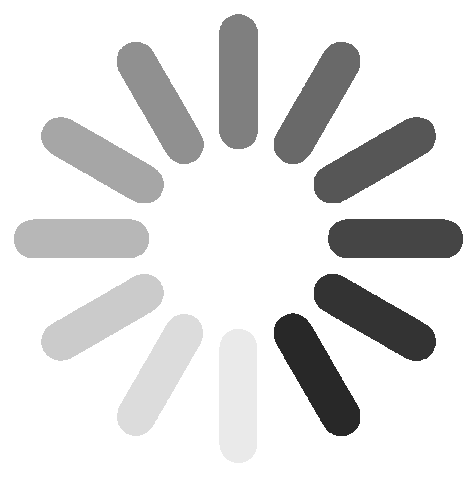

In [298]:

main_plot = datamapplot.create_interactive_plot(
    l3_arr,
    l1_labels,
    l2_labels,
    l3_labels,
    hover_text=hover_labels,
    enable_search=True,
    background_color="#eeeeee",
    label_color_map= custom_color_map,
    marker_size_array=marker_size_array, 
    color_label_text=False
)
main_plot

## From plot to page

Now, we need to add so-called ['Front matter'](https://jekyllrb.com/docs/front-matter/) to the plot to ensure that the plot appears as as single page in our Github Pages. We'll use a function do this

In [299]:
target_directory = 'plots'
def front_matter(figure,stakeholder_id):
    # Define the text to be added at the top of the HTML file
    header_text = f"""---
layout: page
title: {stakeholder_id}
permalink: /{stakeholder_id}/
nav_exclude: true
---
"""

    target_directory = 'plots'
    # Ensure the target directory exists
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    # Define the full file path
    file_path = os.path.join(target_directory, f"{stakeholder_id}.html")

    # Save the figure's HTML representation to a file within the target directory
    figure.save(file_path)

    # Read the saved HTML file
    with open(file_path, 'r') as f:
        figure_html = f.read()

    # Combine the header text with the figure's HTML
    full_html = header_text + figure_html

    # Save the combined HTML back to the file in the target directory
    with open(file_path, 'w') as f:
        f.write(full_html)

In [300]:
front_matter(main_plot, 'main_plot')

## Plot Personalization
Preprocess 'StakeholderDiNo_FRs'

1. Creat standard elements names to match with elements in the 'entries_df'

2. Merge 'IT-01' to 'EF-03'

3. Encode the duplicated stakeholders ID (STK-011)

4. Fix #3

5. Rename

In [301]:
# 1

cols_sh = stakeholders_df.columns
for col in cols_sh:
    stakeholders_df[col] = stakeholders_df[col].astype('string')
    stakeholders_df[col]=stakeholders_df[col].str.replace('\n\r',' ')
    stakeholders_df[col]=stakeholders_df[col].str.replace('\n',' ')

stakeholders_df['U-03']=stakeholders_df['U-03'].str.replace('User training (online, on site)','User training (online/on site)')

stakeholders_df['IT-04']=stakeholders_df['IT-04'].str.replace('Local','Local device')
    
# 2
stakeholders_df['EF-03']= stakeholders_df[['EF-03', 'IT-01']].apply(
    lambda row: ', '.join(row.dropna().astype(str)) if row.dropna().size > 0 else pd.NA, axis=1)
stakeholders_df.drop(columns=['IT-01'], inplace=True)

# 3

stakeholders_df['Count'] = stakeholders_df.groupby('Stakeholder ID').cumcount() + 1
stakeholders_df['TotalCount'] = stakeholders_df.groupby('Stakeholder ID')['Stakeholder ID'].transform('count')


stakeholders_df['New Stakeholder ID'] = stakeholders_df.apply(
    lambda x: x['Stakeholder ID'] + '-' + str(x['Count']).zfill(2) if x['TotalCount'] > 1 else x['Stakeholder ID'],
    axis=1
)

stakeholders_df['Stakeholder ID']=stakeholders_df['New Stakeholder ID']
stakeholders_df.drop(['Count','TotalCount','New Stakeholder ID'],axis=1,inplace=True)

# 4
x_sh = stakeholders_df.shape[0]  
y_sh = stakeholders_df.shape[1]  

for i in range(x_sh):
    for j in range(y_sh):
        if not pd.isna(stakeholders_df.iloc[i, j]) and stakeholders_df.iloc[i, j] in fix_03:
            stakeholders_df.iloc[i, j] = stakeholders_df.iloc[i, j] + '-' + cols[j]

# 5
stakeholders_df.rename(columns=rename_dict,inplace=True )



stakeholders_df


,Stakeholder ID,License,Customizable user interface,Languages,Support,Data input,Data import (formats),Data export,Templates,Searchability,...,Preservation of evidence,Compliance,Laboratory management functions,Integrations and extensions,Automation,(Individual) Project management tools,Workflows,Controlled vocabulary,Data access (client),Data storage location
0,STK-003 STK-021 STK-027 STK-043,<NA>,<NA>,<NA>,<NA>,"With internal links, Rich text editor",Image formats,<NA>,"Subject specific templates, Define own templates",<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Local device, Provider's Cloud"
1,STK-020,<NA>,<NA>,<NA>,<NA>,With internal links,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,"Instrument management, LIMS connectivity, Samp...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Local device
2,STK-011-01,<NA>,<NA>,<NA>,<NA>,<NA>,"MS Office formats, Image formats",<NA>,Define own templates,"Tagging, File/data hierarchy, Advanced/conditi...",...,<NA>,<NA>,<NA>,"Protocols.io, One Drive",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,STK-002,<NA>,Yes-U-02,<NA>,User training (online/on site),<NA>,<NA>,Complete content in document format,Define own templates,Advanced/conditional search,...,<NA>,<NA>,"Ordering function, Asset management, Sample Tr...","Slack, Figshare",<NA>,<NA>,<NA>,<NA>,Browser based,Local device
4,STK-045,<NA>,<NA>,<NA>,Online documentation,With external links,MS Office formats,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Browser based,Local device
5,STK-042,<NA>,Yes-U-02,<NA>,<NA>,"Annotation, Rich text editor, Freehand/Sketches","Document formats, Image formats, Structured fo...",<NA>,<NA>,"Advanced/conditional search, File/data hierarchy",...,<NA>,<NA>,"Sample Tracking, Materials database","SnapGene (Dotmatics), One Drive, Dropbox",Autoupload/folder watch,"Task management, Taskboard",<NA>,<NA>,Browser based,"Local device, Provider's Cloud"
6,STK-037,<NA>,<NA>,<NA>,<NA>,Rich text editor,Image formats,<NA>,Define own templates,Advanced/conditional search,...,Audit Trail,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Local device, Provider's Cloud"
7,STK-014,<NA>,<NA>,<NA>,User training (online/on site),<NA>,<NA>,Formats suitable for long term archiving,Define own templates,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Local device, Provider's Cloud"
8,STK-010,<NA>,<NA>,<NA>,User training (online/on site),<NA>,<NA>,<NA>,<NA>,Advanced/conditional search,...,Versioning,<NA>,<NA>,<NA>,"Data analysis, Other API",<NA>,<NA>,<NA>,<NA>,<NA>
9,STK-024,<NA>,Yes-U-02,<NA>,User training (online/on site),<NA>,<NA>,<NA>,Define own templates,"Filtering, Advanced/conditional search, File/d...",...,"Timestamping, Electronic signature, Locking, A...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Yes-IT-03,<NA>,<NA>


create extra dataframe to build 'marker_alpha_array' and 'marker_color_array'

In [302]:

for i,j in enumerate(l3_labels):
    if j == 'Unlabelled':
        l3_labels[i] = l2_labels[i]
extra_data = pd.DataFrame(
    { 'l1':l1_labels, 'l3':l3_labels}
)

<InteractiveFigure width=100% height=800>
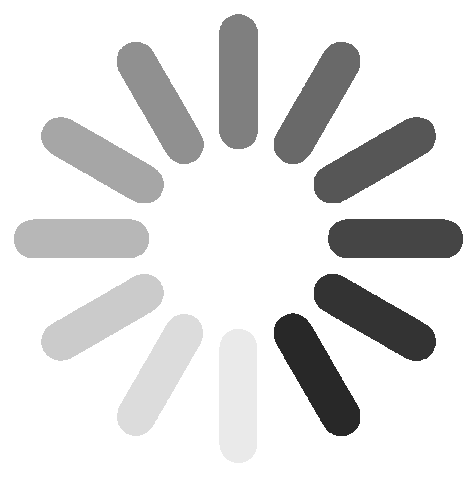

In [303]:
# creat color_map of l1
unique_l1 = list(set(l1_labels))
ps_color_map = {label: color_map[i % len(color_map)] for i, label in enumerate(unique_l1)}

# creat color_map of l3
l3_color_map = {row['l3']: ps_color_map[row['l1']] for index, row in extra_data.iterrows()}

#creat marker color array     
marker_color_array = extra_data.l3.map(l3_color_map)

for idx, stakehoder_contri in stakeholders_df.iterrows():
    chosed_items = []
    for col_name, value in stakehoder_contri.iloc[1:].items():
        if isinstance(value, str) and pd.notna(value):
            items = value.split(',')
            for item in items:
                chosed_items.append(item.strip())


    marker_alpha_array = np.array([0.1 if value not in chosed_items else 1.0
                                   for value in extra_data['l3']])



    personalized_plot = datamapplot.create_interactive_plot(
        l3_arr,
        l1_labels,
        l2_labels,
        l3_labels,
        hover_text=hover_labels,
        enable_search=True,
        background_color="#eeeeee",
        marker_color_array=marker_color_array,
        marker_alpha_array=marker_alpha_array,
        marker_size_array=marker_size_array, 
        color_label_text=False
        )
    
    front_matter(personalized_plot,stakehoder_contri["Stakeholder ID"])
personalized_plot


Grey without contributing

<InteractiveFigure width=100% height=800>
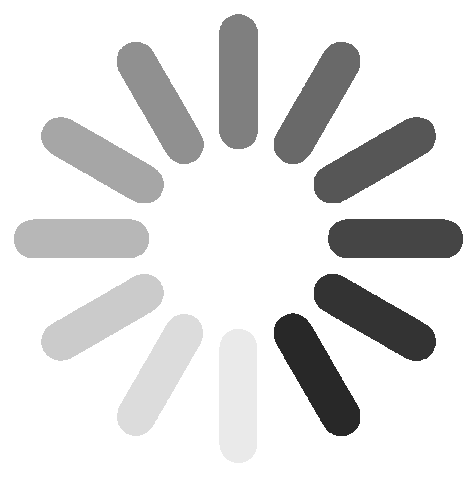

In [304]:

l3_color_map_copy = l3_color_map.copy()



for idx, stakehoder_contri in stakeholders_df.iterrows():
    
    for key in l3_color_map_copy:
        l3_color_map_copy[key] = '#808080'
    chosed_items = []
    for col_name, value in stakehoder_contri.iloc[1:].items():
        if isinstance(value, str) and pd.notna(value):
            items = value.split(',')
            for item in items:
                chosed_items.append(item.strip())

    marker_alpha_array_grey = np.array([0.2 if value not in chosed_items else 1.0
                                   for value in extra_data['l3']])
                
    for item in chosed_items:
        for key, l3_label in l3_color_map_copy.items():
             if item in key:
                 l3_color_map_copy[key] = l3_color_map[key]

    marker_color_array_grey = extra_data.l3.map(l3_color_map_copy)  
    plot_grey = datamapplot.create_interactive_plot(
        l3_arr,
        l1_labels,
        l2_labels,
        l3_labels,
        hover_text=hover_labels,
        enable_search=True,
        background_color="#eeeeee",
        marker_color_array=marker_color_array_grey,
        marker_alpha_array=marker_alpha_array_grey,
        marker_size_array=marker_size_array, 
        color_label_text=False
        )

    front_matter(plot_grey,stakehoder_contri["Stakeholder ID"])
              
plot_grey

Create a function to define front-matter and/or a file location to allow automatic site structure development.
Create a function to define stakeholder contribution table in a markdown file.

In [305]:
def page_front_matter(title, permalink, output_file,page_content):
    
    header_text = f"""---
layout: page
title: {title}
permalink: {permalink}
---

"""

    full_markdown = header_text + page_content
    with open(output_file, "w") as f:
        f.write(full_markdown)





In [306]:
def contri_table(directory_path, base_url="https://oiseau-lab.github.io/research-notebooks"):

    markdown_table = "| Stakeholder ID | Link |\n"
    markdown_table += "| --- | --- |\n"

   
    files_with_times = [(filename, os.path.getmtime(os.path.join(directory_path, filename)))
                        for filename in os.listdir(directory_path)
                        if filename.endswith('.html')]

   
    files_with_times.sort(key=lambda x: x[1])


    for filename, _ in files_with_times:
        stakeholder_id = filename[:-5]
        markdown_link = f"[{stakeholder_id} Plot]({base_url}/{stakeholder_id}/)"
        markdown_table += f"| {stakeholder_id} | {markdown_link} |\n"
    
    return markdown_table


markdown_table = contri_table('plots')

page_front_matter('Stakeholder Engagement', '/Stakeholder-Engagement/','Stakeholder-Engagement.md',markdown_table)

<InteractiveFigure width=100% height=800>
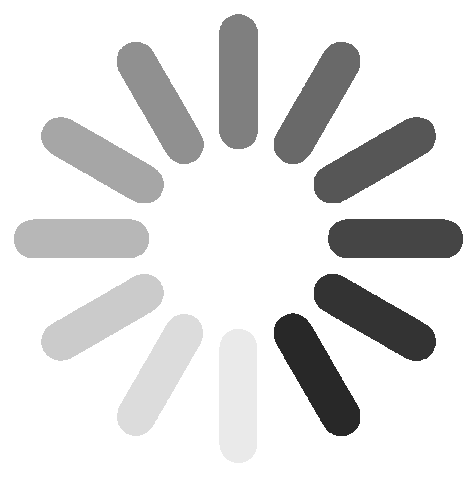

In [307]:
l3_color_map_copy = l3_color_map.copy()
for key in l3_color_map_copy:
        l3_color_map_copy[key] = '#808080'
        
for idx, stakehoder_contri in stakeholders_df[stakeholders_df['Stakeholder ID']=='STK-002'].iterrows():
    
   
    for col_name, value in stakehoder_contri.iloc[1:].items():
        if isinstance(value, str) and pd.notna(value):
            items = value.split(',')
            for item in items:
                chosed_items.append(item.strip())

    marker_alpha_array_grey = np.array([0.2 if value not in chosed_items else 1.0
                                   for value in extra_data['l3']])
                
    for item in chosed_items:
        for key, l3_label in l3_color_map_copy.items():
             if item in key:
                 l3_color_map_copy[key] = l3_color_map[key]

    marker_color_array_grey = extra_data.l3.map(l3_color_map_copy)  
    plot_grey = datamapplot.create_interactive_plot(
        l3_arr,
        l1_labels,
        l2_labels,
        l3_labels,
        hover_text=hover_labels,
        enable_search=True,
        background_color="#eeeeee",
        marker_color_array=marker_color_array_grey,
        marker_alpha_array=marker_alpha_array_grey,
        marker_size_array=marker_size_array, 
        color_label_text=False
        )


              
plot_grey


## Create homepage

JB: The below method ignores the GitHub Pages / Jekyll formatting - abandon!

In [308]:
"""
homepage_file = "index.html"
with open(homepage_file, "w") as f:
    f.write("<html><head><title>Stakeholder Plots</title></head><body>")
    f.write("<h1>Stakeholder Engagements</h1>")
    f.write("<ul>")
    for stakeholder_id in stakeholders_df['Stakeholder ID']:
      
        f.write(f'<li><a href="{target_directory}/{stakeholder_id}.html">{stakeholder_id}</a></li>')
    f.write("</ul>")
    f.write("</body></html>")
"""


'\nhomepage_file = "index.html"\nwith open(homepage_file, "w") as f:\n    f.write("<html><head><title>Stakeholder Plots</title></head><body>")\n    f.write("<h1>Stakeholder Engagements</h1>")\n    f.write("<ul>")\n    for stakeholder_id in stakeholders_df[\'Stakeholder ID\']:\n      \n        f.write(f\'<li><a href="{target_directory}/{stakeholder_id}.html">{stakeholder_id}</a></li>\')\n    f.write("</ul>")\n    f.write("</body></html>")\n'